In [1]:
import sys
!{sys.executable} -m pip install PyWavelets

import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
from scipy.signal import wiener  


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
# Utils

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image
def display_image(image, title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Calculer le PSNR entre deux images
def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value

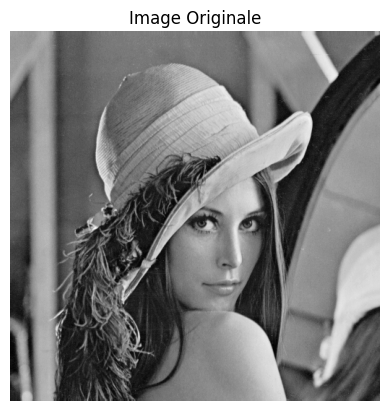

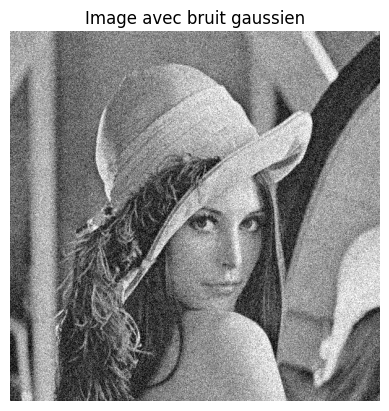

PSNR entre l'image originale et l'image bruitée :  20.07689890185251
PSNR avec h=0.08 : 29.81
PSNR avec h=0.10 : 29.90
PSNR avec h=0.12 : 29.51
PSNR avec h=0.13 : 29.08
PSNR avec h=0.15 : 28.54


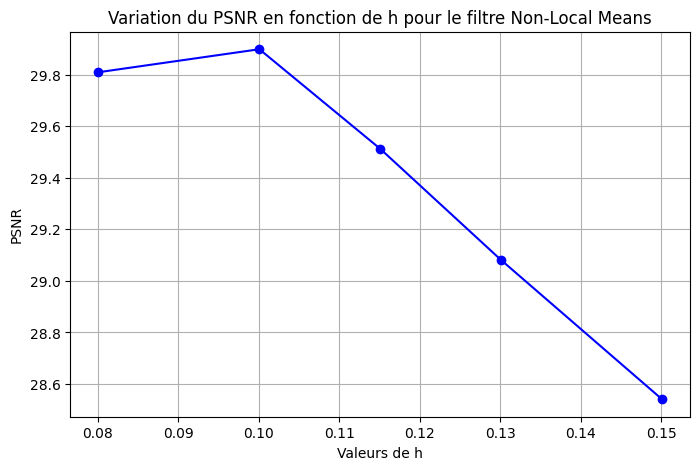

In [ ]:
image = io.imread("lena.pgm", as_gray=True)
display_image(image, "Image Originale")

image = image / 255.0

noise_variance = 0.01
image_noised = image + np.random.normal(0, np.sqrt(noise_variance), image.shape)
image_noised = np.clip(image_noised, 0, 1)
display_image(image_noised, 'Image avec bruit gaussien')

psnr_originale_bruitee = psnr(image * 255, image_noised * 255)
print("PSNR entre l'image originale et l'image bruitée : ", psnr_originale_bruitee)

sigma_est = np.mean(estimate_sigma(image_noised))

h_values = [0.8 * sigma_est, 1.0 * sigma_est, 1.15 * sigma_est, 1.3 * sigma_est, 1.5 * sigma_est]
psnr_values = []

for h in h_values:
    image_filtree = denoise_nl_means(image_noised, h=h, fast_mode=True, patch_size=5, patch_distance=6)

    psnr_val = psnr(image * 255, image_filtree * 255)
    psnr_values.append(psnr_val)
    print(f"PSNR avec h={h:.2f} : {psnr_val:.2f}")

plt.figure(figsize=(8, 5))
plt.plot(h_values, psnr_values, marker='o', linestyle='-', color='b')
plt.xlabel("Valeurs de h")
plt.ylabel("PSNR")
plt.title("Variation du PSNR en fonction de h pour le filtre Non-Local Means")
plt.grid()
plt.show()
